In [11]:
## Load packages
library(ggplot2)
library(dplyr)
options(repr.plot.width=20, repr.plot.height=10)
snp.names <- readLines("../inputfiles/snp.names")
all.fst <- read.csv("outflank/outflank.thinned.csv")[,c(1,2,3,15)]
all.fst$LocusName <- gsub("\\.[0-9]+", "", all.fst$LocusName)
head(all.fst)

,LocusName,He,FST,OutlierFlag
,<chr>,<dbl>,<dbl>,<lgl>
1,232_pilon_2036,0.04054424,0.003180230,FALSE
2,335_pilon_972,0.03310320,0.015963394,FALSE
3,341_pilon_1400,0.07372778,0.012276337,FALSE
4,536_pilon_3491,0.02571911,0.002899539,FALSE
5,794_pilon_11572,0.03736961,-0.001459879,FALSE
6,1009_pilon_1199,0.02476391,-0.001584578,FALSE


## Bayescan results
- Bayescan detected no outlier loci

## outFlank results

In [18]:
outflank <- readLines("outflank/outflank.outliers.loci")
outflank

[1] "22845_pilon_21316"    "38948_pilon_27399"    "41950_pilon_50866"   
 [4] "43953_pilon_6455"     "49150_pilon_108095"   "55180_pilon_1698"    
 [7] "61086_pilon_2498"     "64444_pilon_21010"    "67749_pilon_4410"    
[10] "78696_pilon_35444"    "80652_pilon_1211"     "87121_pilon_5841"    
[13] "92013_pilon_10508"    "98145_pilon_5343"     "102684_pilon_5263"   
[16] "103835_pilon_1643"    "110673_pilon_20700"   "120765_pilon_2031"   
[19] "132666_pilon_7217"    "134438_pilon_3107"    "135818_pilon_6357"   
[22] "139985_pilon_1404"    "142032_pilon_1347"    "147180_pilon_17454"  
[25] "148831_pilon_2574"    "181231_pilon_3961"    "183746_pilon_14459"  
[28] "185042_pilon_3632"    "186965_pilon_0_2535"  "200020_pilon_7057"   
[31] "202625_pilon_20075"   "207091_pilon_623"     "257918_pilon_16155"  
[34] "265933_pilon_1742"    "267657_pilon_1176"    "271640_pilon_737"    
[37] "284542_pilon_1491"    "292802_pilon_14259"   "296530_pilon_0_16003"

### Baypass results

In [17]:
baypass <- readLines("baypass/baypass.outliers.loci")
baypass

[1] "11109_pilon_0_9627"  "15505_pilon_1182"    "17843_pilon_14110"  
 [4] "27601_pilon_14553"   "37918_pilon_5372"    "48400_pilon_59645"  
 [7] "71299_pilon_4998"    "72684_pilon_1115"    "81760_pilon_21713"  
[10] "88968_pilon_13757"   "90479_pilon_294"     "94230_pilon_23398"  
[13] "96091_pilon_11444"   "100040_pilon_3995"   "102827_pilon_7466"  
[16] "121264_pilon_6161"   "123135_pilon_1053"   "137993_pilon_19876" 
[19] "143934_pilon_248"    "147858_pilon_956"    "149609_pilon_959"   
[22] "153020_pilon_349"    "153512_pilon_132"    "154544_pilon_11063" 
[25] "161620_pilon_735"    "164644_pilon_6837"   "173398_pilon_0_7671"
[28] "174665_pilon_41371"  "184246_pilon_8558"   "198417_pilon_2344"  
[31] "204938_pilon_220"    "214603_pilon_405"    "229749_pilon_457"   
[34] "235691_pilon_9106"   "236078_pilon_4226"   "242520_pilon_3777"  
[37] "246002_pilon_2110"   "249802_pilon_1496"   "260302_pilon_2507"  
[40] "271143_pilon_2990"   "283882_pilon_10357"  "292870_pilon_1_817" 
[43] "293334_pilon_3311"

#### Are there any common loci?
Nope

In [14]:
both <- intersect(outflank, baypass)
length(both)

[1] 0

In [15]:
all.fst$outlier <- "neutral"
all.fst$outlier[all.fst$LocusName %in% baypass] <- "baypass"
all.fst$outlier[all.fst$LocusName %in% outflank] <- "outflank"
all.fst$outflank <- all.fst$outlier == "outflank"
all.fst$baypass <- all.fst$outlier == "baypass"
#all.fst$outlier[all.fst$LocusName %in% both] <- "both"
all.fst$outlier <- ordered(all.fst$outlier, levels = c("neutral", "baypass", "outflank"))

all.fst %<>%
  mutate(order = 
    case_when(
      (outlier == "neutral") ~ 1,
      (outlier == "baypass") ~ 2,
      (outlier == "outflank") ~ 3,
      (outlier == "both") ~ 4,
    )
  ) %>%
  arrange(order)
head(all.fst)

,LocusName,He,FST,OutlierFlag,outlier,outflank,baypass,order
,<chr>,<dbl>,<dbl>,<lgl>,<ord>,<lgl>,<lgl>,<dbl>
1,232_pilon_2036,0.04054424,0.003180230,FALSE,neutral,FALSE,FALSE,1
2,335_pilon_972,0.03310320,0.015963394,FALSE,neutral,FALSE,FALSE,1
3,341_pilon_1400,0.07372778,0.012276337,FALSE,neutral,FALSE,FALSE,1
4,536_pilon_3491,0.02571911,0.002899539,FALSE,neutral,FALSE,FALSE,1
5,794_pilon_11572,0.03736961,-0.001459879,FALSE,neutral,FALSE,FALSE,1
6,1009_pilon_1199,0.02476391,-0.001584578,FALSE,neutral,FALSE,FALSE,1


In [16]:
putatives <- all.fst %>% filter(He >= 0.1 & (outflank | baypass))
length(putatives$LocusName)
putatives$LocusName

[1] 4

[1] "55180_pilon_1698"  "78696_pilon_35444" "92013_pilon_10508"
[4] "98145_pilon_5343"

In [19]:
corrected.names <- strsplit(putatives$LocusName, "_")
corr.names <- FALSE

Replacing the final underscore with a whitespace will make the locus and positions names suitable for isolation using `vcftools --exclude-positions` and `--positions`.

In [20]:
for(i in 1:length(corrected.names)){
    .string <- corrected.names[[i]]
    strlen <- length(.string)
    chr <- paste(.string[1:(strlen-1)], collapse = "_")
    corr.names[i] <- paste(chr, .string[strlen], sep = " ")
}
corr.names

[1] "55180_pilon 1698"  "78696_pilon 35444" "92013_pilon 10508"
[4] "98145_pilon 5343"

In [22]:
write.table(corr.names, file = "bft.putative.outliers", row.names = F, col.names = F, quote = F)

## The plot

In [25]:
mycolors <- c("#bbbbbb","#ea3c00", "dodgerblue")

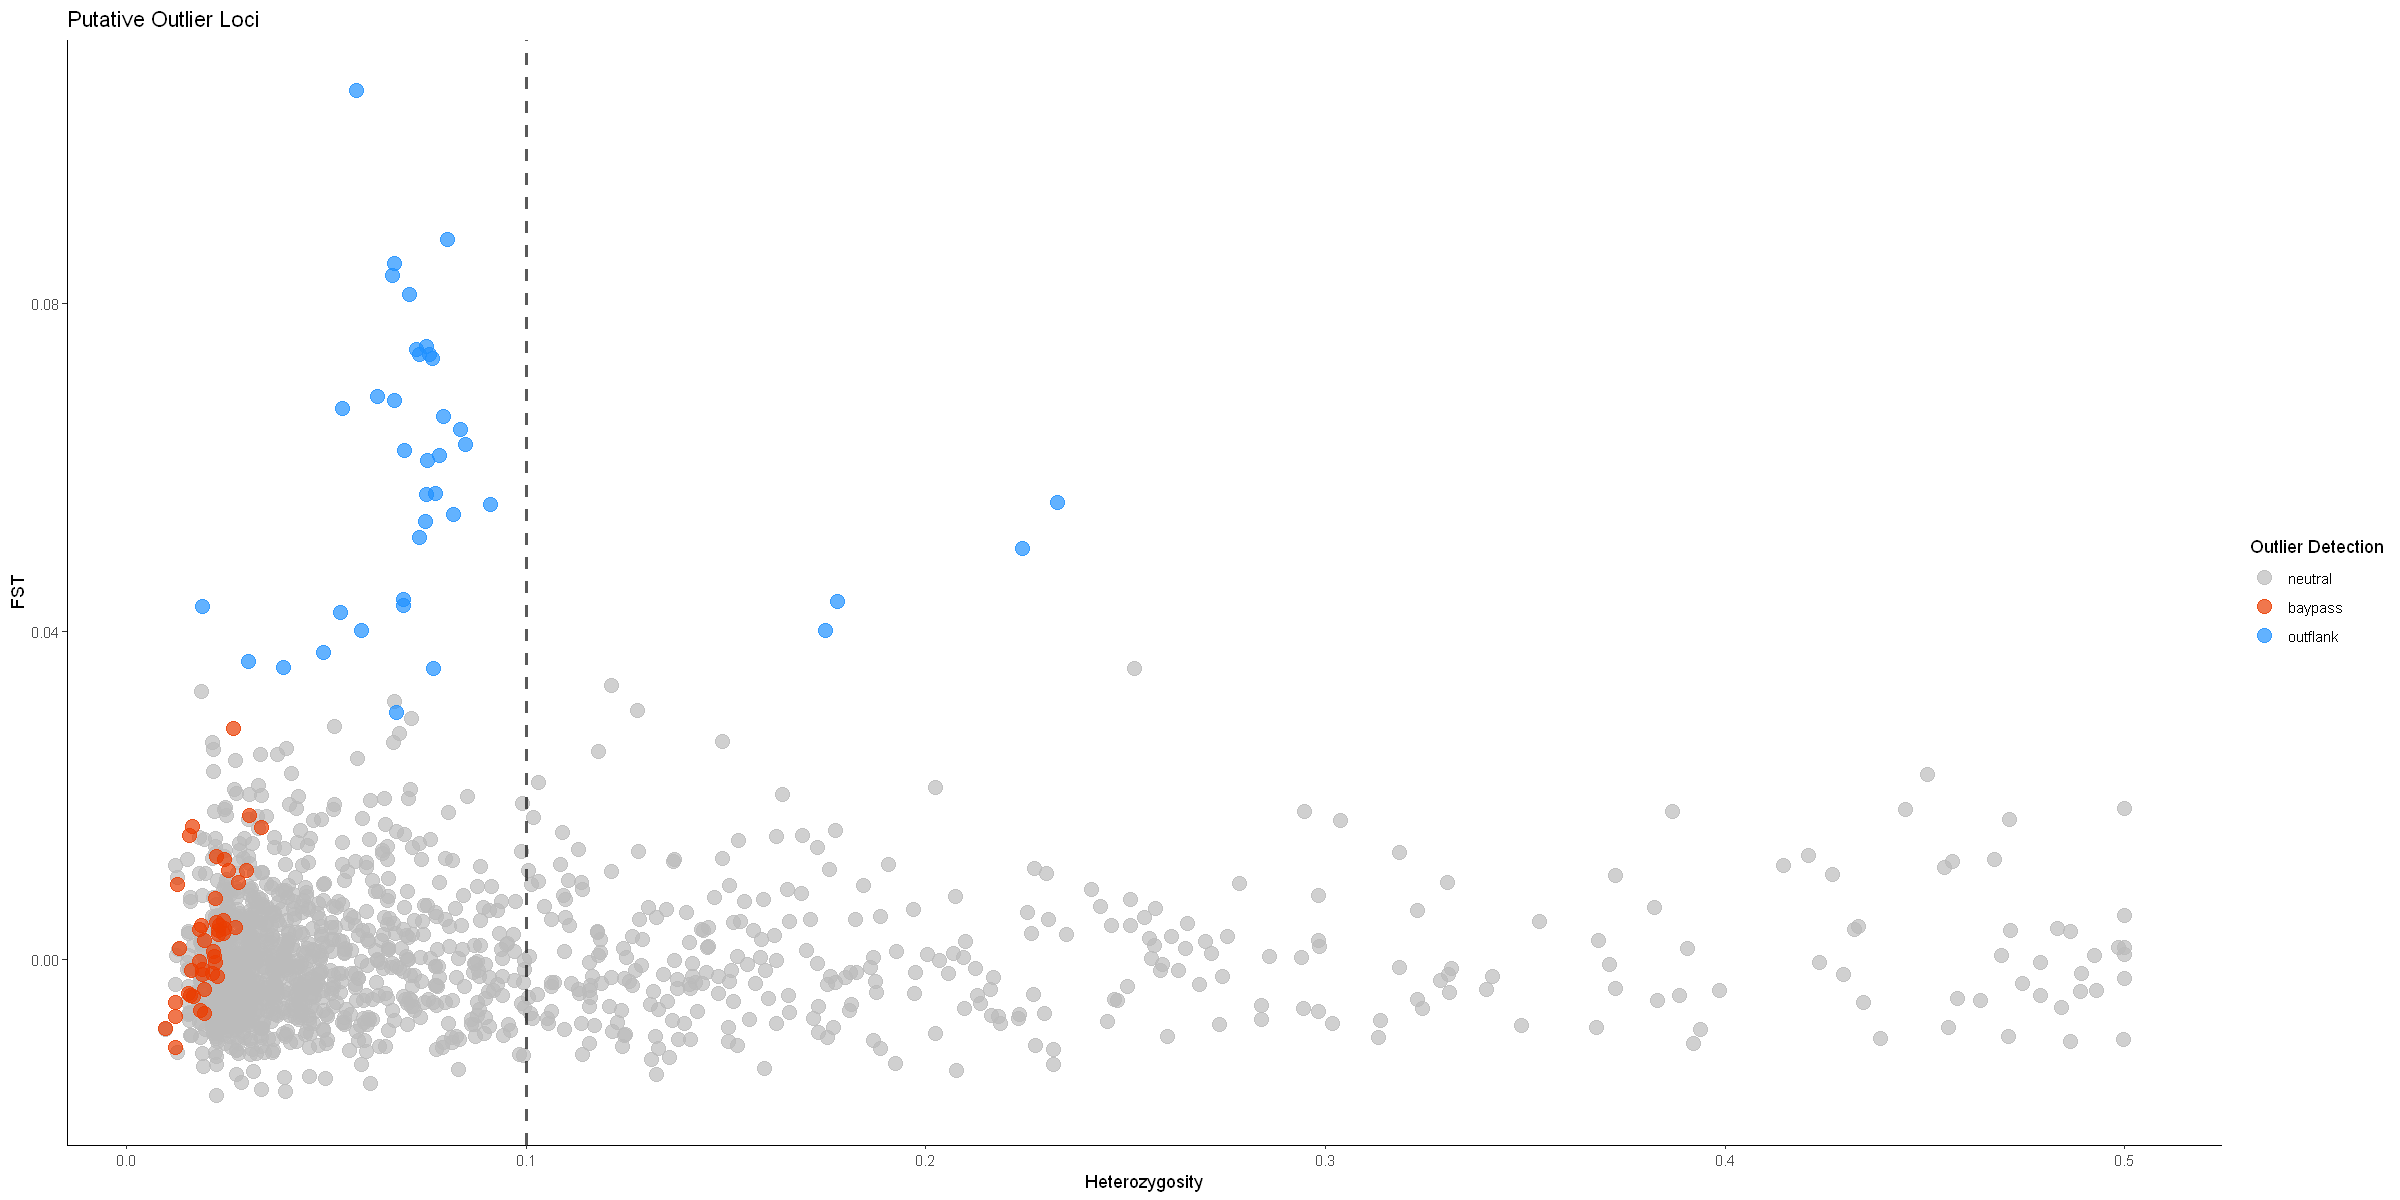

In [26]:
all.fst %>%
  ggplot(x = He, y = FST) +
  geom_point(aes(x = He, y = FST, col = outlier), alpha = 0.7,  size = 4) +
  geom_vline(xintercept = 0.1, alpha = 0.65, linetype = "dashed", size = 1) +
  labs(title = "Putative Outlier Loci", x = "Heterozygosity", y = "FST", color = "Outlier Detection", shape = "Bayescan Detection") +
  scale_color_manual(values = mycolors) +
  theme_classic()

In [27]:
ggsave("outliers.png", height = 6, width = 12, units = "in")